# Training

In [1]:
from six.moves import cPickle as pickle
from matplotlib import pyplot
import numpy as np
import torch
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.facecolor': (1, 1, 1, 1)}

To perform training, run `python train.py`

In [2]:
DATASET = 'census'
with open('results/train/{}.meta.pkl'.format(DATASET), 'rb') as f:
    meta = pickle.load(f)
print(list(meta.keys()))
args = meta['args']
stepsizes = meta['stepsizes']

['args', 'losses', 'stepsizes']


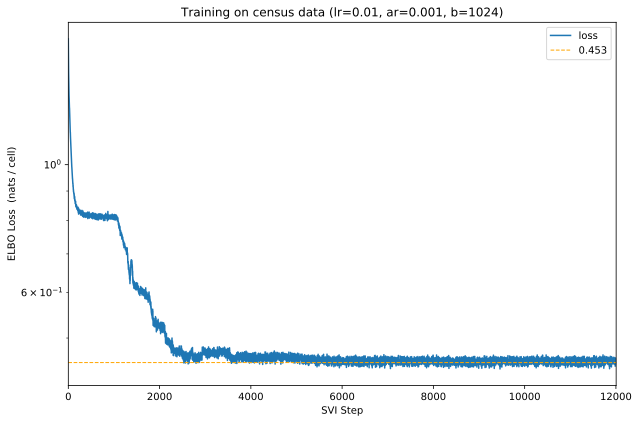

In [3]:
pyplot.figure(figsize=(9, 6))
pyplot.plot(meta['losses'], label='loss')
pyplot.ylabel('ELBO Loss  (nats / cell)')
pyplot.xlabel('SVI Step')
asymptote = np.mean(meta['losses'][int(0.9 * len(meta['losses']))])
pyplot.axhline(asymptote, color='orange', linestyle='--', lw=1.,
               label='{:0.3g}'.format(asymptote))
pyplot.yscale('log')
pyplot.xlim(0, len(meta["losses"]))
pyplot.title('Training on {} data (lr={}, ar={}, b={})'.format(
             args.dataset,
             args.learning_rate,
             args.annealing_rate,
             args.batch_size))
pyplot.legend(loc='best')
pyplot.tight_layout()

In [4]:
def downsample(series, factor):
    series = torch.tensor(series)
    series = series[:len(series) // factor * factor]
    return series.reshape(-1, factor).mean(-1).numpy()

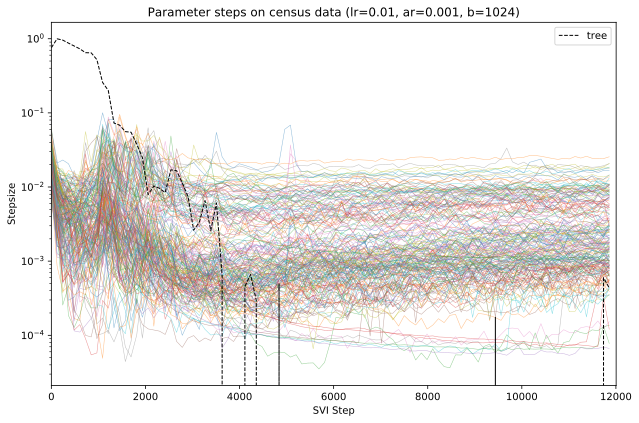

In [5]:
factor = (1 + len(stepsizes) // 100)
pyplot.figure(figsize=(9, 6))
blacklist = ["treecat_edges", "treecat_count_stats",
             "treecat_vertex_stats", "treecat_complete_stats"]
for key in stepsizes[-1]:
    if key in blacklist:
        continue
    series = downsample([s.get(key, 0) for s in stepsizes], factor)
    X = range(0, len(series) * factor, factor)
    if key == 'tree':
        pyplot.plot(X, series, 'k--', label="tree", lw=1)
    else:
        pyplot.plot(X, series, alpha=0.5, lw=0.5)
pyplot.ylabel('Stepsize')
pyplot.xlabel('SVI Step')
pyplot.xlim(0, len(meta["losses"]))
pyplot.yscale('log')
pyplot.title('Parameter steps on {} data (lr={}, ar={}, b={})'.format(
             args.dataset,
             args.learning_rate,
             args.annealing_rate,
             args.batch_size))
pyplot.legend(loc='best')
pyplot.tight_layout()